In [ ]:
N = 500
k = 40
T = 1000

number of possible rules: 256
starting rule


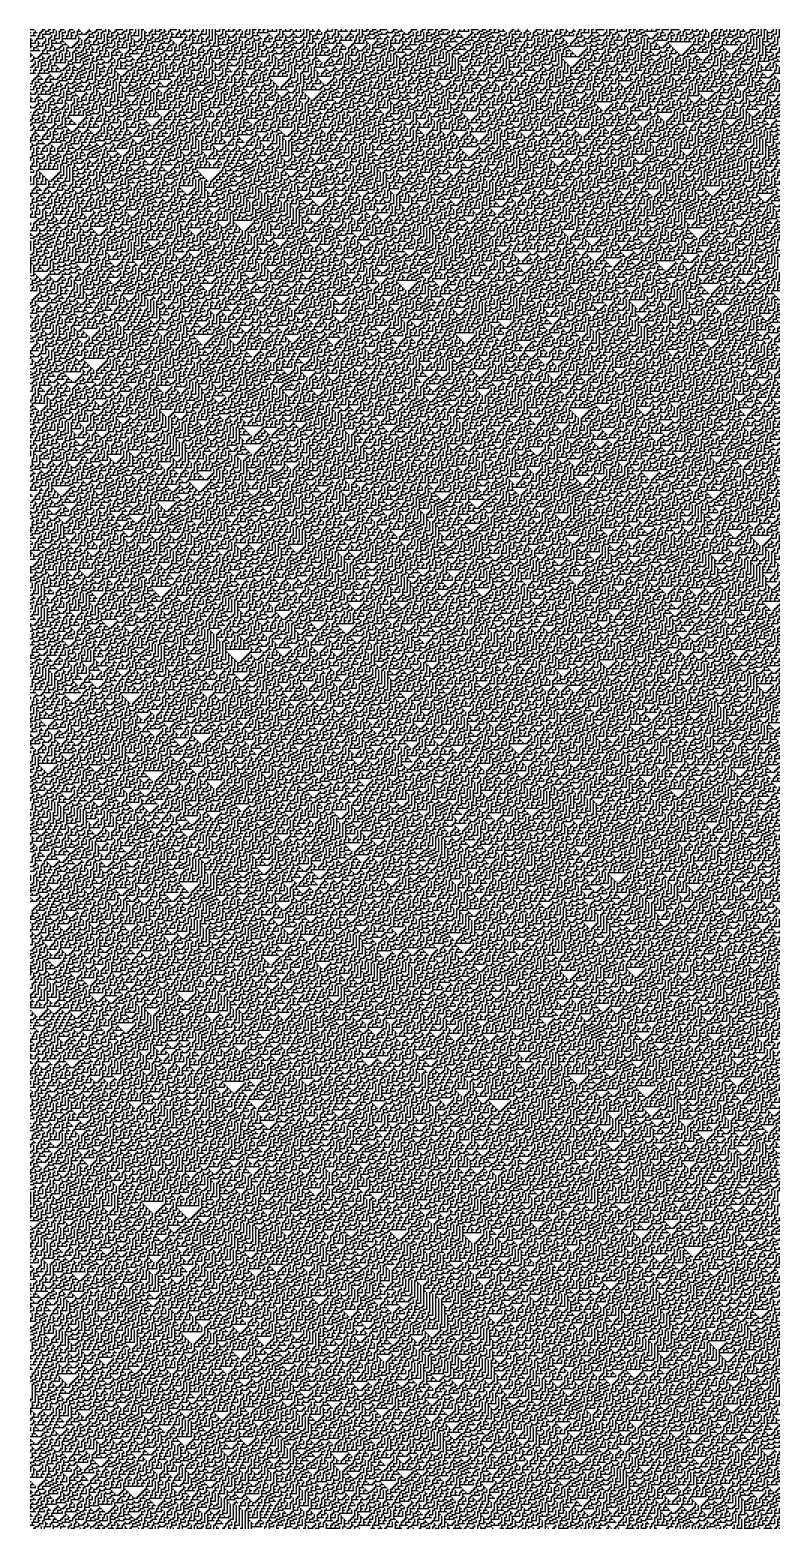

finished
all finished


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

time = 1000
size = 500
base = 2
save_every_step = False

# creating empty world x-axis = space size, y-axis time
cells = np.zeros((size, time), dtype=np.int32)


# random starting configuration
def random_start():
    return np.random.randint(0, base, size)
cells[:, 0] = random_start()


# Convert rule to number in Wolfram notation
def rule_from_number(n, base, length):
    rule = np.zeros(length)
    i = -1
    while n > (base - 1):
        res = n % base
        n = n // base
        rule[i] = res
        i -= 1
    rule[i] = n
    return rule


# create all possibpe position variations for given base
configurations = []
for k in range(base ** 3):
    configurations.append(rule_from_number(k, base, 3))
    #print(configurations)
configurations = np.array(configurations[::-1])
#print(configurations)
#print('number of possible rules: {}'.format(base ** (base ** 3)))

def img_save(t, number, cells):
    plt.figure(figsize=(5, 5), dpi=300)
    plt.set_cmap('jet')
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.imshow(cells[:, :].T, cmap="Greys")
    #plt.savefig("step_{}_n{}.png".format(t, number), bbox_inches='tight', pad_inches=0)
    plt.show()


def automata_generate(rules, number):
    #print('starting rule'.format(rules))
    # save starting configuration
    if save_every_step:
        img_save(0, number, cells)
    # generate every step
    for t in range(1, time):
        left = np.roll(cells[:, t - 1], 1)
        right = np.roll(cells[:, t - 1], -1)
        center = cells[:, t - 1]
        for n in range(size):
            # print(left[n], center[n], right[n])
            test = np.array([left[n], center[n], right[n]])
            for k, rule in enumerate(configurations):
                if all(rule == test):
                    cells[n, t] = rules[k]
                    break
        if save_every_step:
            img_save(t, number, cells)
    if not save_every_step:
        img_save(time, number, cells)
    print('finished')


# how many different rules to try?
rule_numbers = [30]

for number in rule_numbers:
    rules = rule_from_number(number, base, base **3)
    automata_generate(rules, number)
print('all finished')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def CA(n, size, time, k=1, random=True):
  base = 2
  cells = np.zeros((size, time), dtype=np.int32)

  def random_start():
    return np.random.randint(0, base, size)
  cells[:, 0] = random_start()
  def InitializeFirstRow(size, k):
    firstRow = np.zeros((size - k) // 2, dtype=int)
    firstRow = np.concatenate((firstRow, np.ones(k)))
    firstRow = np.concatenate((firstRow, np.zeros((size - k) // 2 + 1, dtype=int)))
    return firstRow

  if not random:
    cells[:, 0] = InitializeFirstRow(size, k)

  def rule_from_number(n, base, length):
      rule = np.zeros(length)
      i = -1
      while n > (base - 1):
          res = n % base
          n = n // base
          rule[i] = res
          i -= 1
      rule[i] = n
      return rule

  configurations = []
  for k in range(base ** 3):
      configurations.append(rule_from_number(k, base, 3))
  configurations = np.array(configurations[::-1])

  def img_save(t, number, cells):
      plt.figure(figsize=(5, 5), dpi=300)
      plt.set_cmap('jet')
      ax = plt.axes([0, 0, 1, 1])
      plt.axis('off')
      ax.axes.get_xaxis().set_visible(False)
      ax.axes.get_yaxis().set_visible(False)
      plt.imshow(cells[:, :].T, cmap="Greys")
      #plt.savefig("step_{}_n{}.png".format(t, number), bbox_inches='tight', pad_inches=0)
      plt.show()

  def automata_generate(rules, number):
      for t in range(1, time):
          left = np.roll(cells[:, t - 1], 1)
          right = np.roll(cells[:, t - 1], -1)
          center = cells[:, t - 1]
          for n in range(size):
              test = np.array([left[n], center[n], right[n]])
              for k, rule in enumerate(configurations):
                  if all(rule == test):
                      cells[n, t] = rules[k]
                      break
      if not save_every_step:
          img_save(time, number, cells)

  rules = rule_from_number(n, base, base **3)
  automata_generate(rules, n)

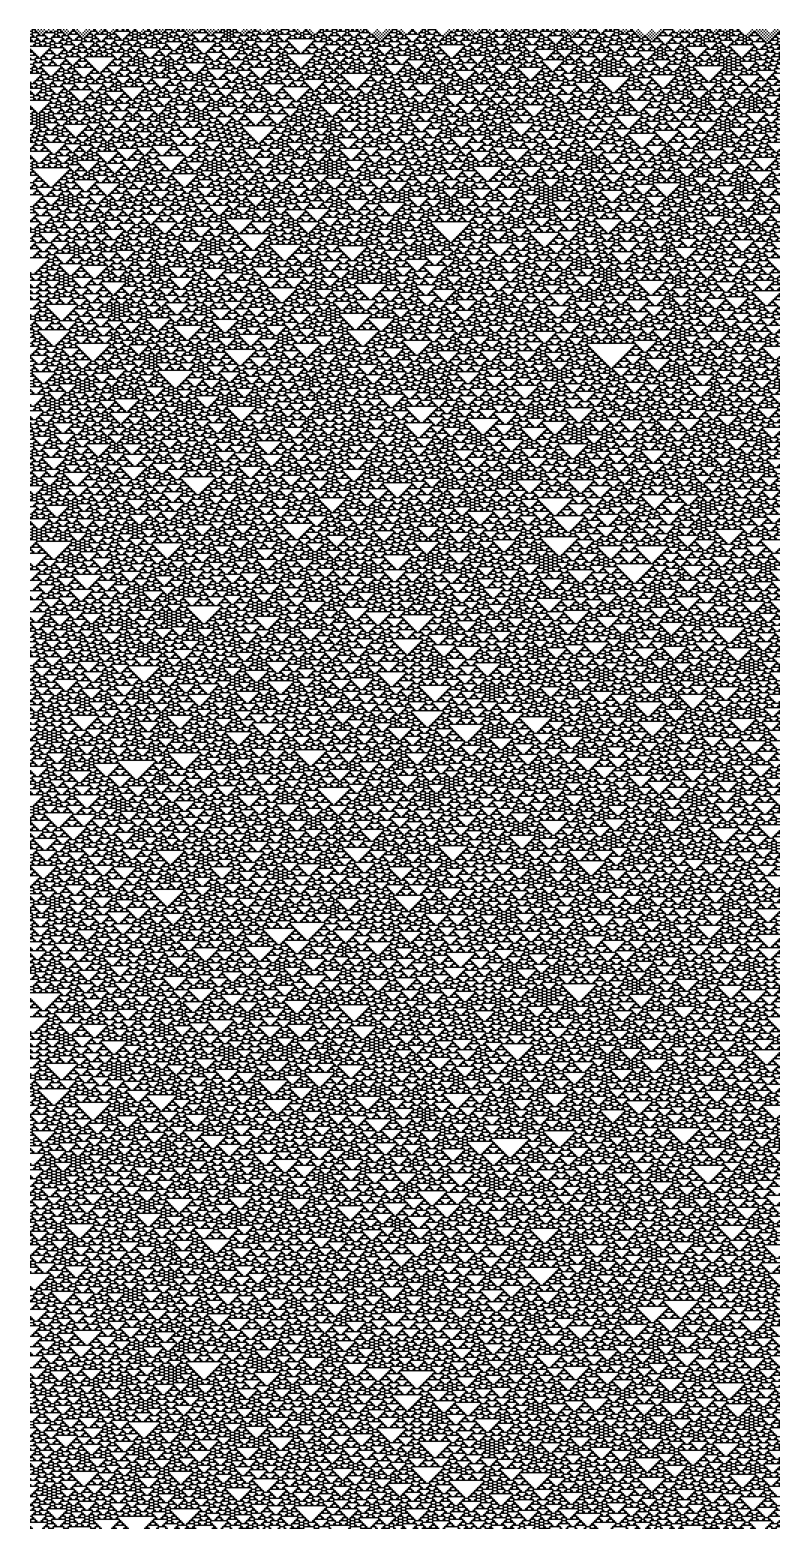

In [ ]:
CA(122, N, T)

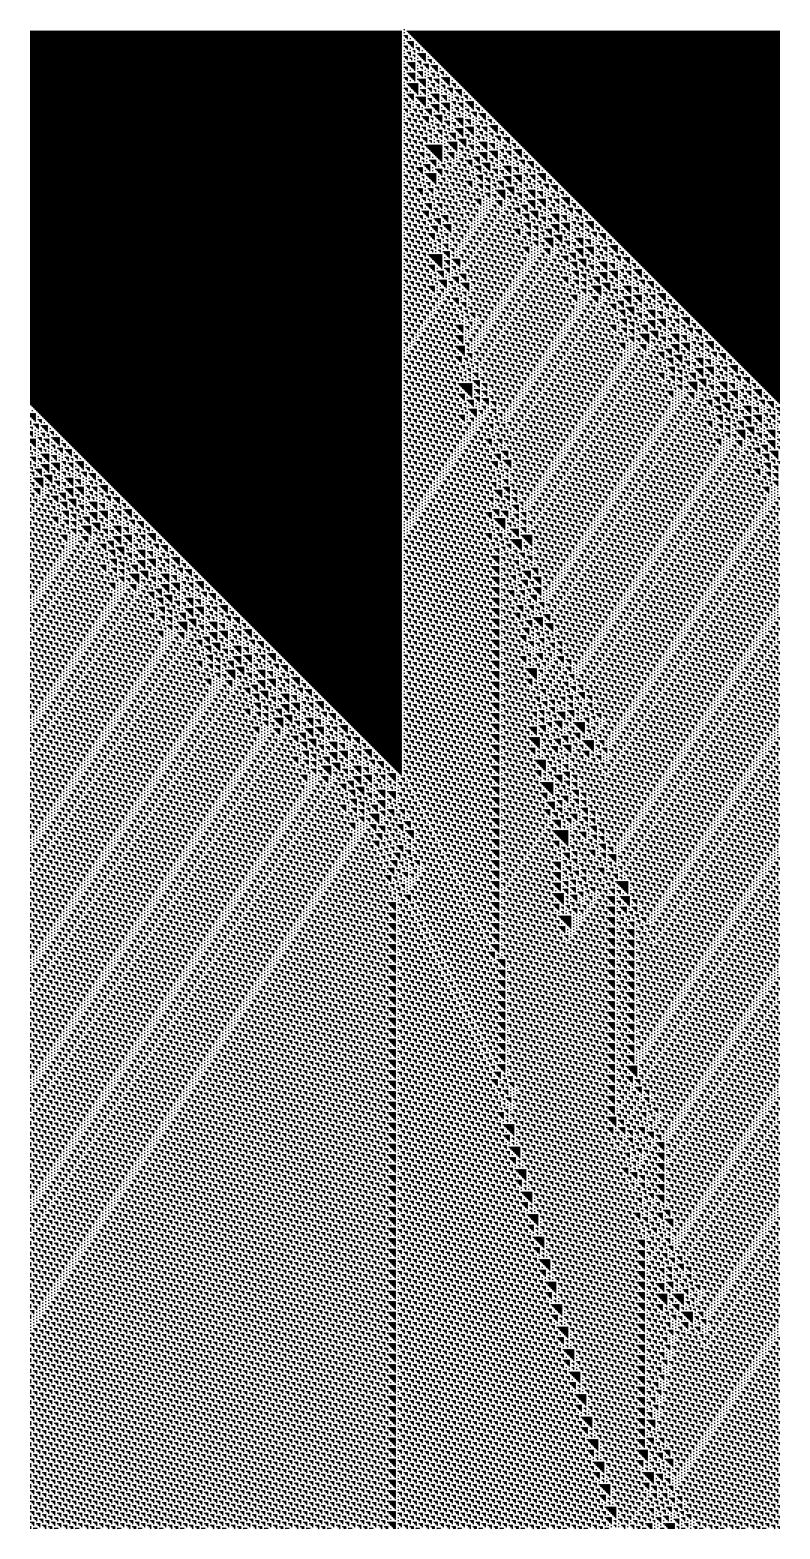

In [ ]:
CA(193, N, T, k=1, random=False)

(500,)


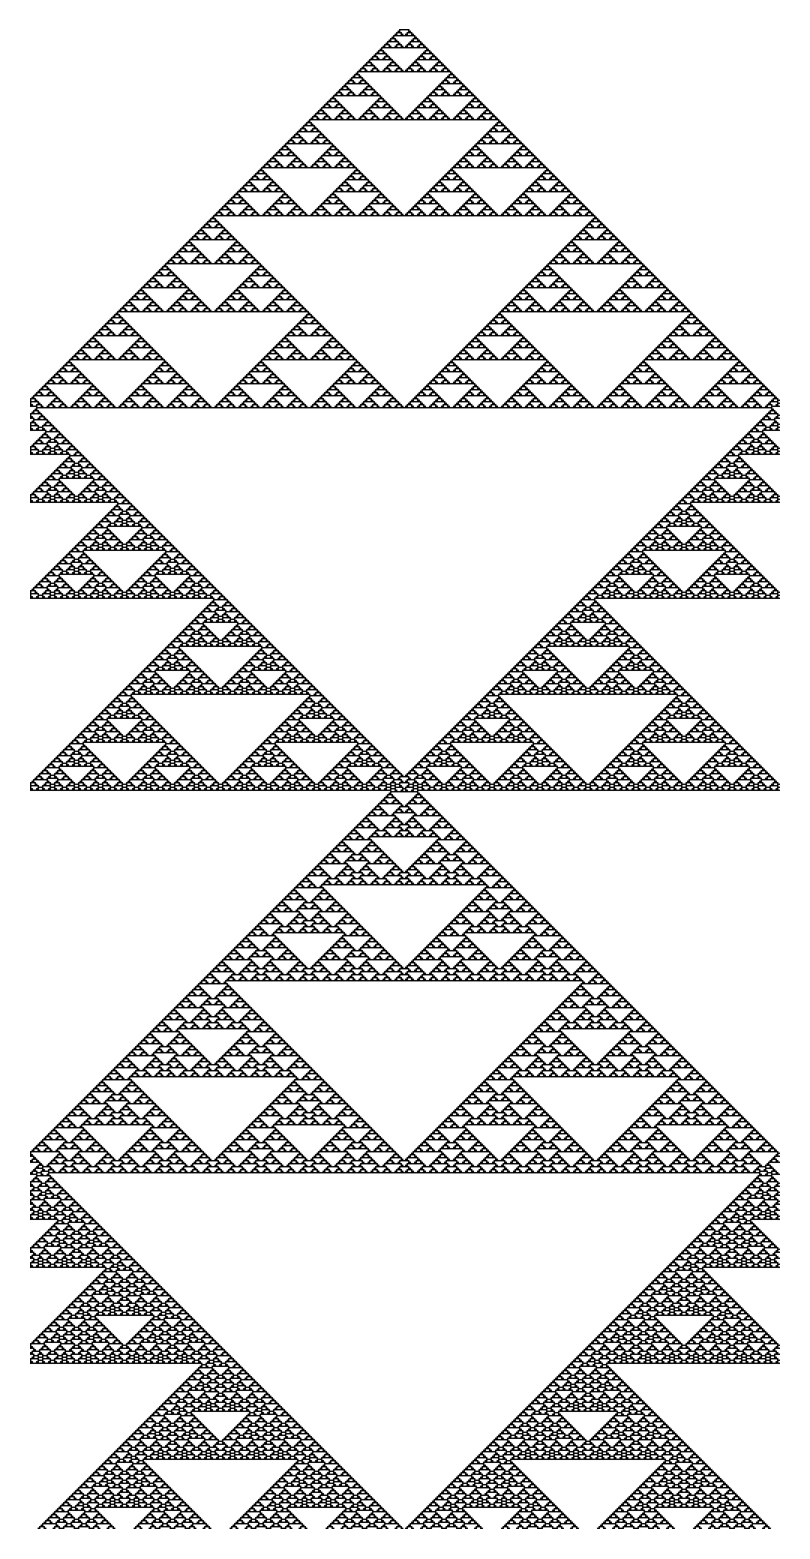

In [ ]:
CA(122, N, T, k, random=False)

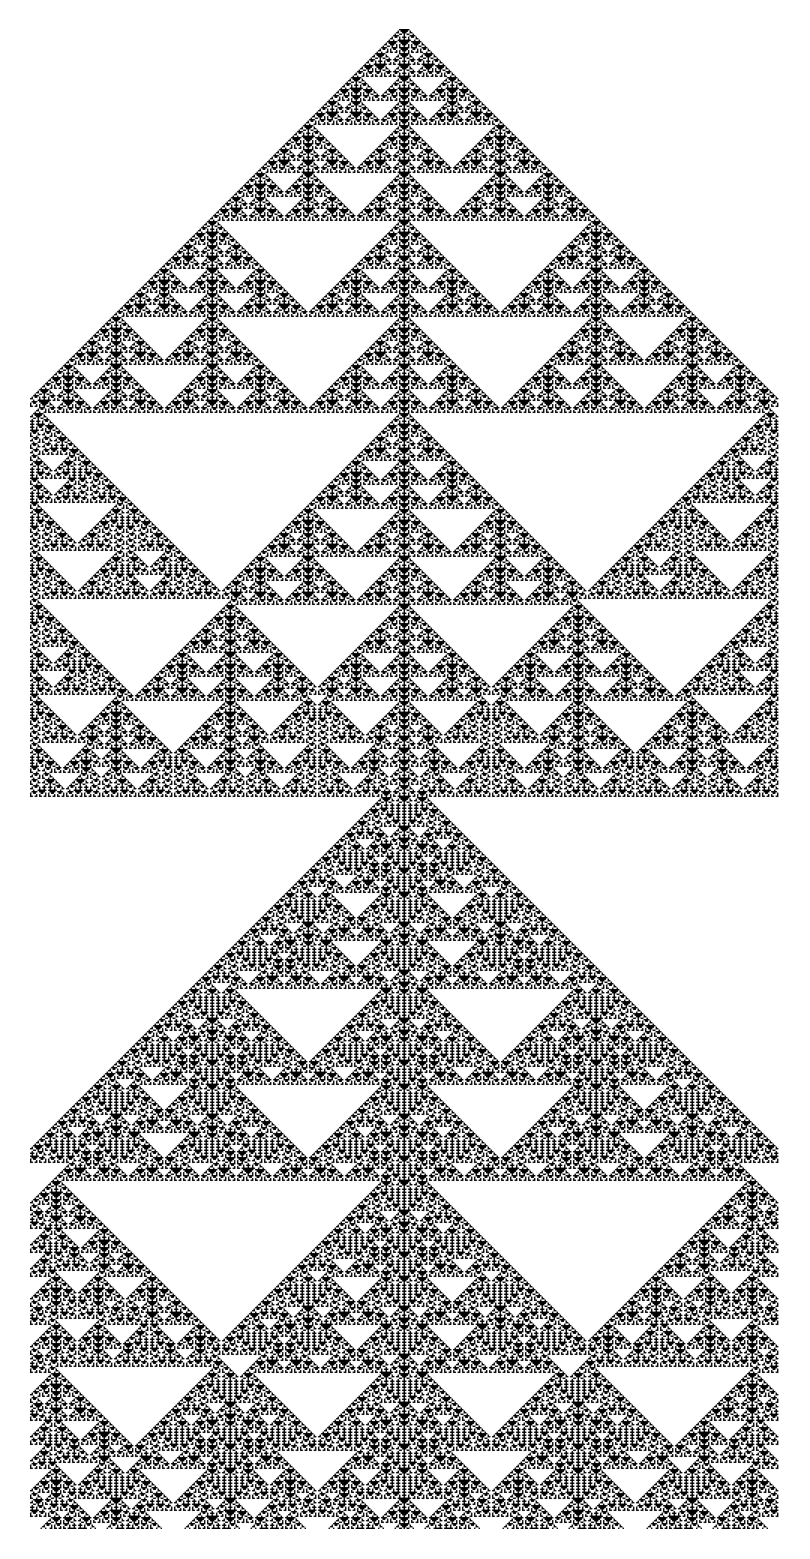

In [ ]:
CA(150, N, T, k, random=False)

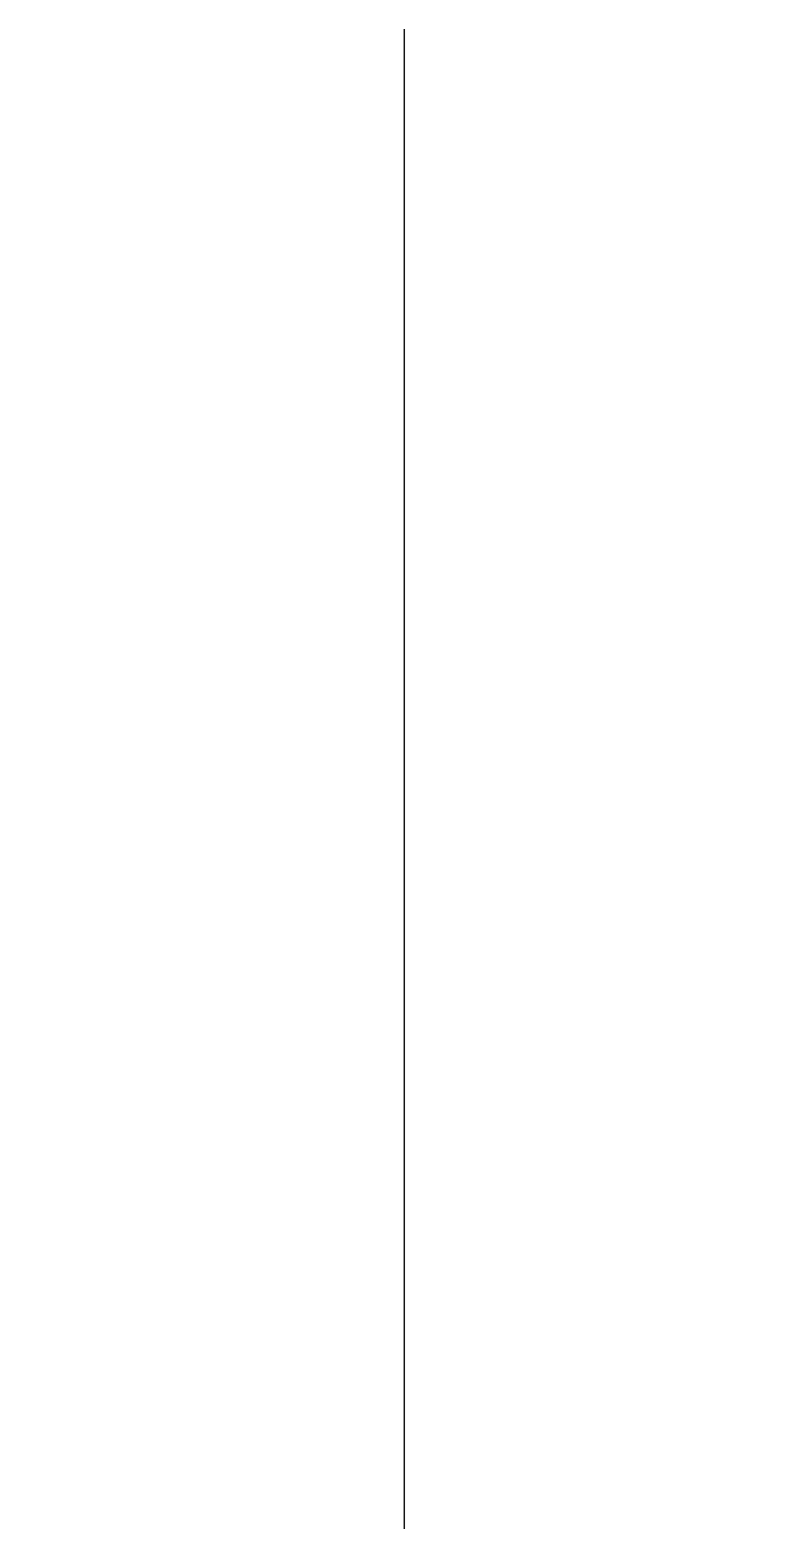

In [ ]:
CA(108, N, T, random=False)

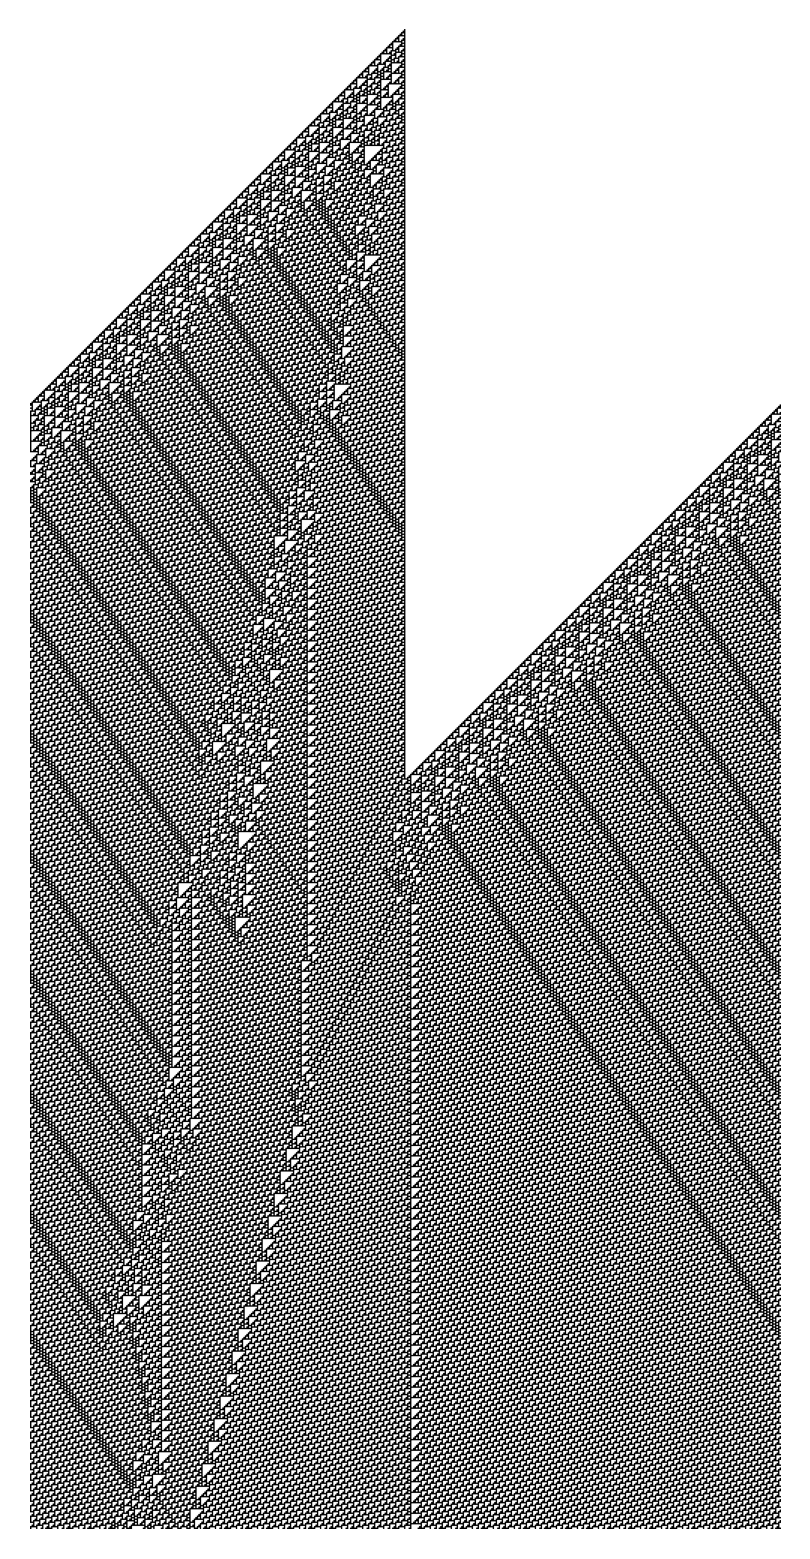

In [ ]:
CA(110, N, T, k=1, random=False)